이번에는 선형회귀를 알아보자. [혼자 공부하는 머신러닝+딥러닝](http://www.yes24.com/Product/Goods/96024871)의 챕터 3-2는 선형회귀를 다루는데 k-최근접 이웃의 한계와 같이 설명을 진행 한다. k-최근접 이웃의 경우에는 이웃인 k개수에 영향을 받게 되는데, 기존에 있는 데이터에 비해 조금이라도 큰 데이터를 예측 해야 하는 경우에 한계를 보인다. 지난 그림과 같이 다음을 비교 해보자.

이미지1

이제 이를 토대로 지난번 k-최근접 이웃 모델에 대해 50cm의 농어는 어떻게 예측을 하게 될지 한번 알아보자. 지난번 코드를 그대로 사용한다. 라이브러리는 지난번에 추가로 선형회귀에 사용할 sklearn.linear_model 패키지의 LinearRegression()를 추가로 넣어 준다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

####  k-최근접 이웃을 사용한 50cm 농어의 무게 예측

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

이제 이 50cm길이의 농어에 대해 예측을 해보자.

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


1,033g으로 예측을 햇는데, 실제로 농어의 무게는 훨씬 더 나간다고 한다. 이를 산점도로 파악해보자. 길이가 50이고 무게가 1,033인 농어는 초록색 세모로, 그 주변의 샘플은 주황색 마름모로 표시해두었따. 이를 통해 보면 길이가 커질수록 농어의 무게가 더 증가하는 경향이 있다. 이 이웃 샘플의 타깃의 평균을 구해보면 그대로 1033이 나오게 된다.더욱 심각한 문제는 아래의 모델로는 길이가 50이던 100이던 10000이던 주변의 타겟에 영향을 받기 때문에 모두 1033의 몸무게를 나타내게 된다.

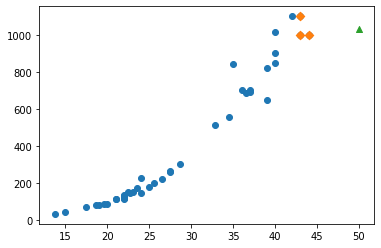

In [7]:
# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])
    
# train set의 산점도를 그린다.
plt.scatter(train_input, train_target)

# train set중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50,1033, marker = '^')
plt.show()

## 선형회귀

이제 선형 회귀에 대해 알아보자. 선형 회귀는 특성을 잘 나타낼 수 있는 직선을 학습 하는 알고리즘이다.